In [3]:
# Import required packages from Pytorch
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

# fix random seed for reproducibility
import numpy as np
np.random.seed(7)

# moves your model to train on your gpu if available else it uses your cpu
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\ADMIN/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:09<00:00, 25.3MB/s] 



Entraînement et évaluation de AlexNet...
Epoch [1/30]
Train Loss: 2.1310, Train Acc: 0.1992
Val Loss: 1.8425, Val Acc: 0.3242
--------------------------------------------------
Epoch [2/30]
Train Loss: 1.7490, Train Acc: 0.3545
Val Loss: 1.6432, Val Acc: 0.3901
--------------------------------------------------
Epoch [3/30]
Train Loss: 1.5708, Train Acc: 0.4215
Val Loss: 1.5750, Val Acc: 0.4172
--------------------------------------------------
Epoch [4/30]
Train Loss: 1.4772, Train Acc: 0.4577
Val Loss: 1.5063, Val Acc: 0.4478
--------------------------------------------------
Epoch [5/30]
Train Loss: 1.4171, Train Acc: 0.4870
Val Loss: 1.5691, Val Acc: 0.4438
--------------------------------------------------
Epoch [6/30]
Train Loss: 1.3629, Train Acc: 0.5067
Val Loss: 1.3802, Val Acc: 0.5006
--------------------------------------------------
Epoch [7/30]
Train Loss: 1.3450, Train Acc: 0.5172
Val Loss: 1.3679, Val Acc: 0.5090
--------------------------------------------------
Epoch 

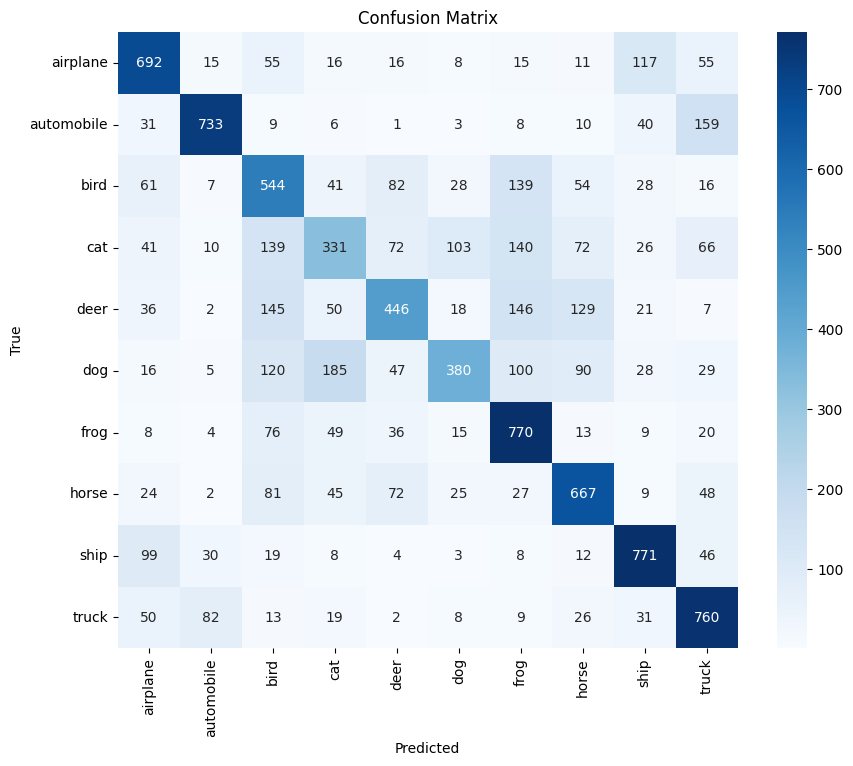

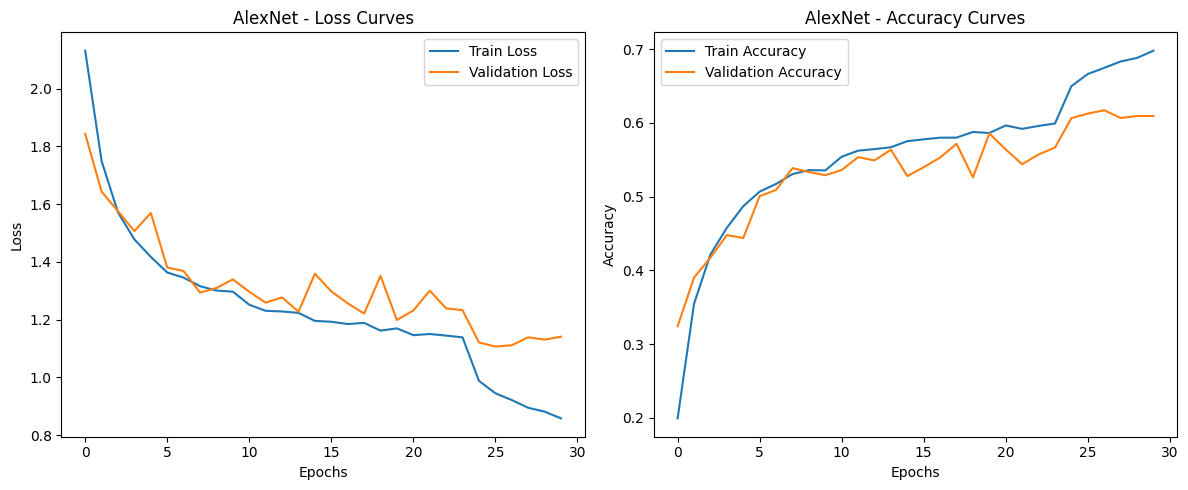


Entraînement et évaluation de AlexNet+SENet...
Epoch [1/30]
Train Loss: 1.7359, Train Acc: 0.3386
Val Loss: 1.6048, Val Acc: 0.3853
--------------------------------------------------
Epoch [2/30]
Train Loss: 1.4454, Train Acc: 0.4639
Val Loss: 1.3432, Val Acc: 0.5037
--------------------------------------------------
Epoch [3/30]
Train Loss: 1.3285, Train Acc: 0.5177
Val Loss: 1.3890, Val Acc: 0.5076
--------------------------------------------------
Epoch [4/30]
Train Loss: 1.2760, Train Acc: 0.5384
Val Loss: 1.2486, Val Acc: 0.5573
--------------------------------------------------
Epoch [5/30]
Train Loss: 1.2510, Train Acc: 0.5481
Val Loss: 1.2091, Val Acc: 0.5698
--------------------------------------------------
Epoch [6/30]
Train Loss: 1.1875, Train Acc: 0.5747
Val Loss: 1.1670, Val Acc: 0.5801
--------------------------------------------------
Epoch [7/30]
Train Loss: 1.1635, Train Acc: 0.5854
Val Loss: 1.1241, Val Acc: 0.6017
--------------------------------------------------


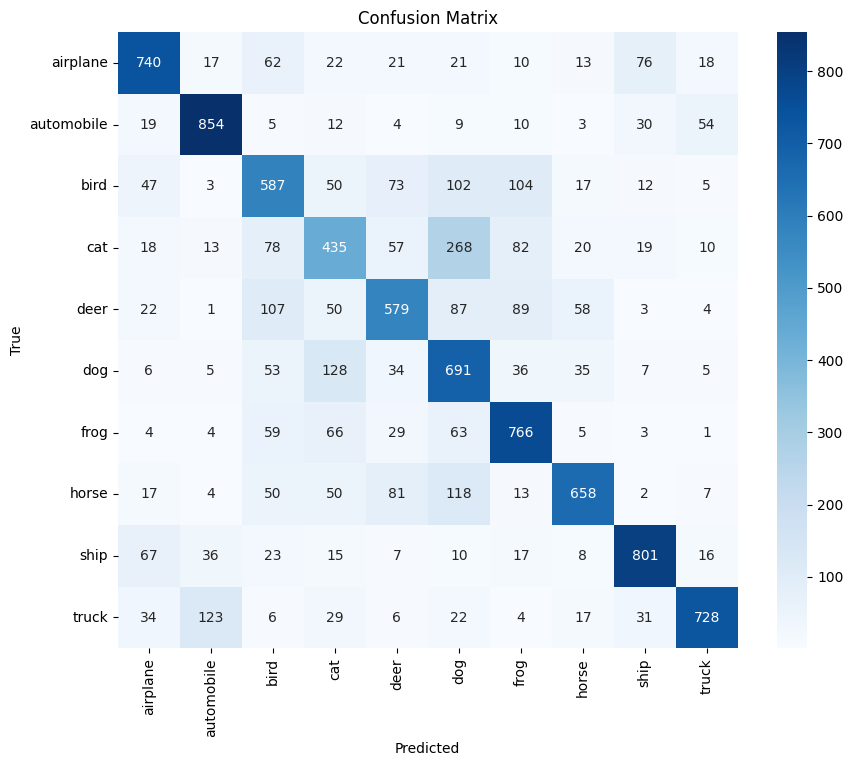

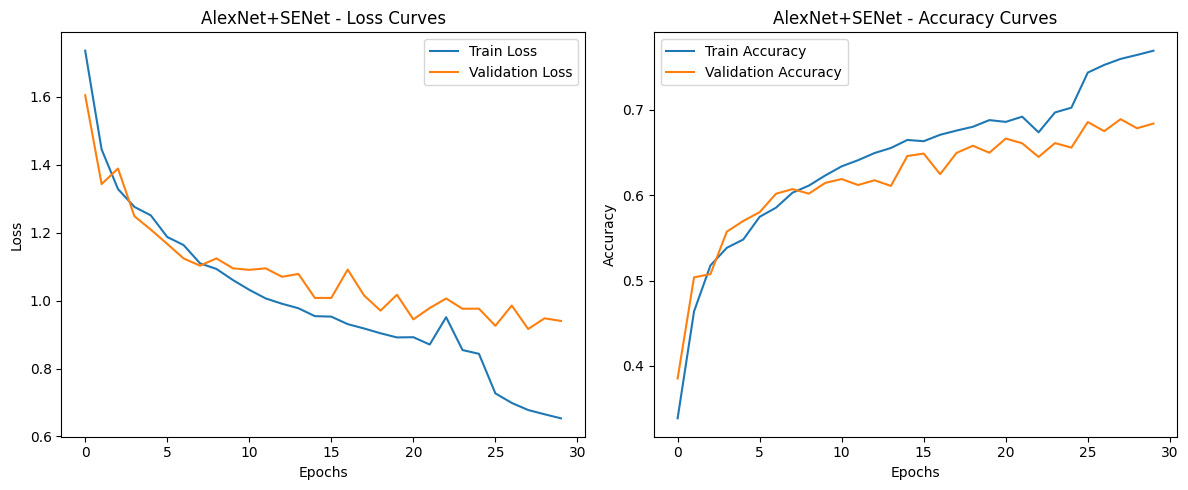


Entraînement et évaluation de AlexNet+CBAM...
Epoch [1/30]
Train Loss: 1.8351, Train Acc: 0.2885
Val Loss: 1.6384, Val Acc: 0.3726
--------------------------------------------------
Epoch [2/30]
Train Loss: 1.4724, Train Acc: 0.4511
Val Loss: 1.4514, Val Acc: 0.4565
--------------------------------------------------
Epoch [3/30]
Train Loss: 1.2632, Train Acc: 0.5404
Val Loss: 1.1415, Val Acc: 0.5806
--------------------------------------------------
Epoch [4/30]
Train Loss: 1.1278, Train Acc: 0.5949
Val Loss: 1.0660, Val Acc: 0.6197
--------------------------------------------------
Epoch [5/30]
Train Loss: 1.0289, Train Acc: 0.6348
Val Loss: 0.9623, Val Acc: 0.6598
--------------------------------------------------
Epoch [6/30]
Train Loss: 0.9615, Train Acc: 0.6590
Val Loss: 0.9314, Val Acc: 0.6744
--------------------------------------------------
Epoch [7/30]
Train Loss: 0.9071, Train Acc: 0.6798
Val Loss: 0.9696, Val Acc: 0.6573
--------------------------------------------------
E

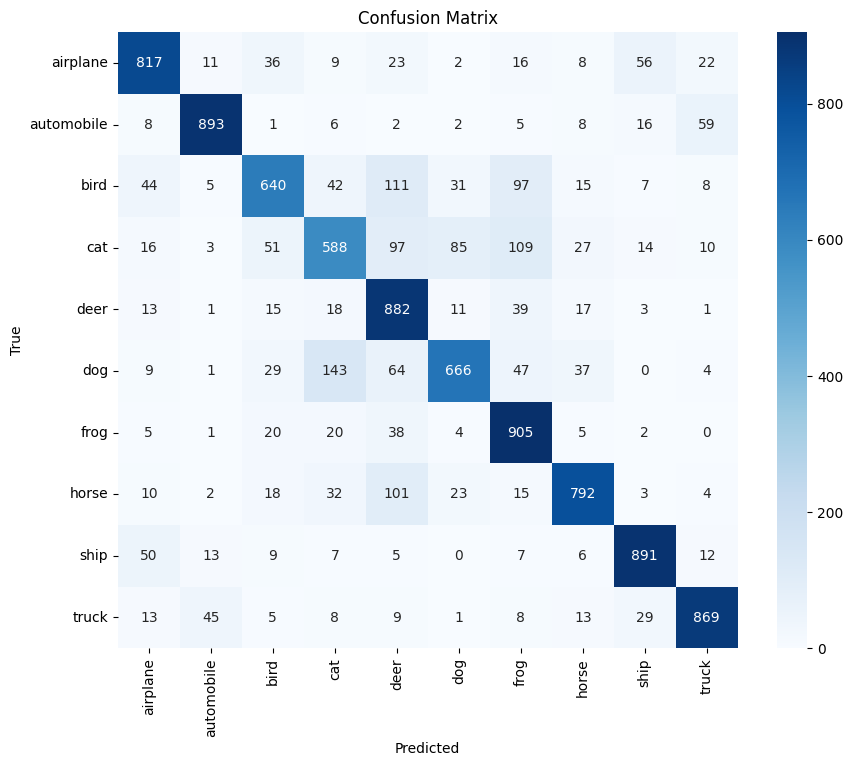

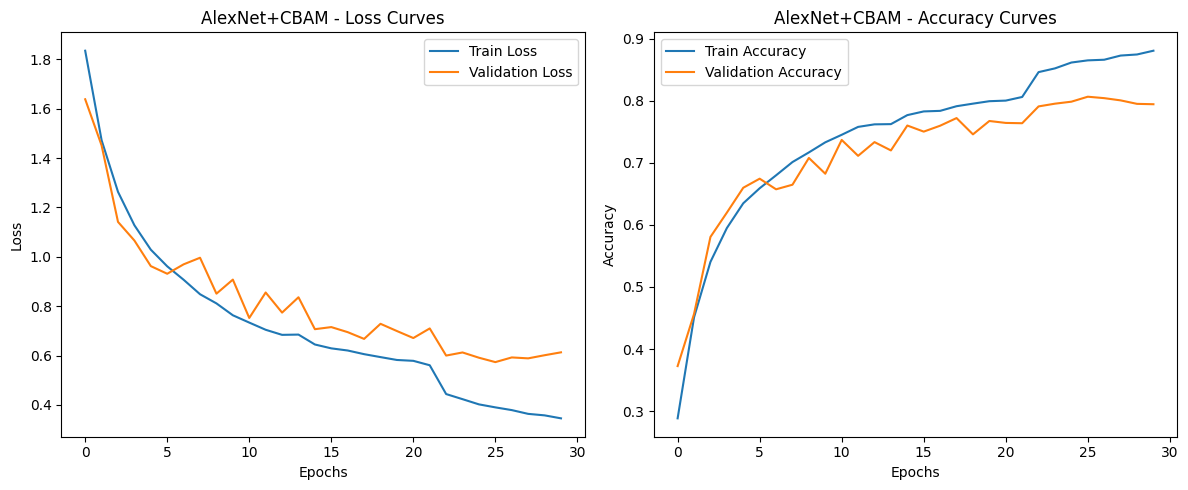


Entraînement et évaluation de AlexNet+CBAM+SENet...
Epoch [1/30]
Train Loss: 1.8005, Train Acc: 0.3079
Val Loss: 1.6379, Val Acc: 0.3700
--------------------------------------------------
Epoch [2/30]
Train Loss: 1.4739, Train Acc: 0.4528
Val Loss: 1.3433, Val Acc: 0.5110
--------------------------------------------------
Epoch [3/30]
Train Loss: 1.2550, Train Acc: 0.5448
Val Loss: 1.1722, Val Acc: 0.5775
--------------------------------------------------
Epoch [4/30]
Train Loss: 1.1279, Train Acc: 0.5957
Val Loss: 1.1959, Val Acc: 0.5699
--------------------------------------------------
Epoch [5/30]
Train Loss: 1.0471, Train Acc: 0.6259
Val Loss: 1.0657, Val Acc: 0.6259
--------------------------------------------------
Epoch [6/30]
Train Loss: 0.9845, Train Acc: 0.6510
Val Loss: 1.0391, Val Acc: 0.6351
--------------------------------------------------
Epoch [7/30]
Train Loss: 0.9359, Train Acc: 0.6677
Val Loss: 0.9965, Val Acc: 0.6511
----------------------------------------------

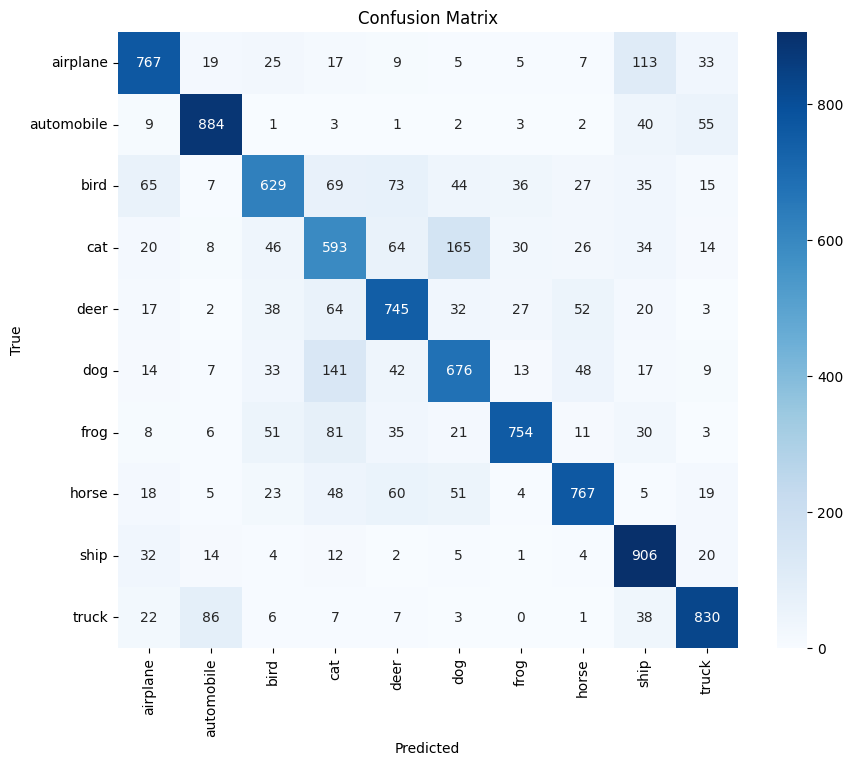

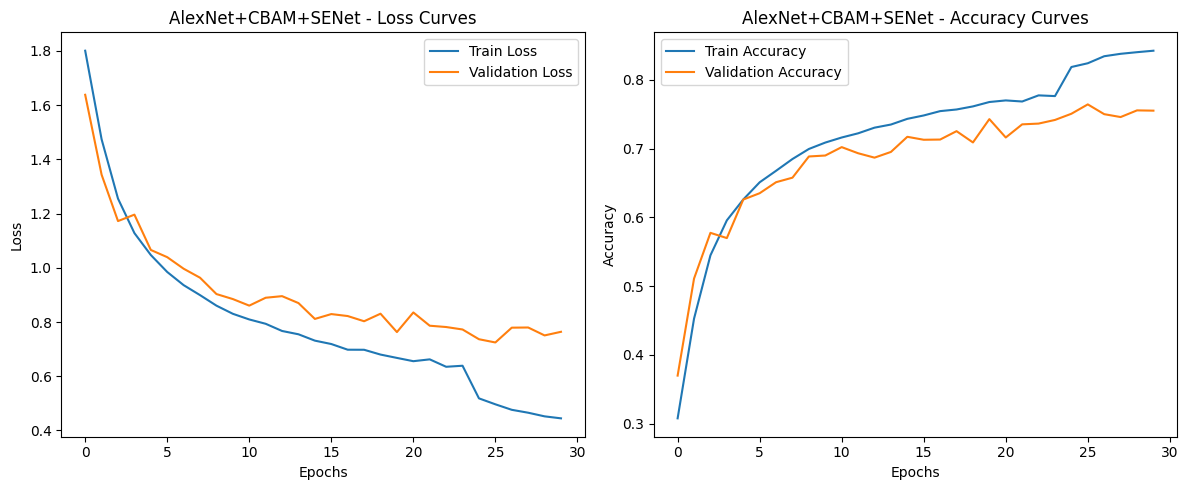

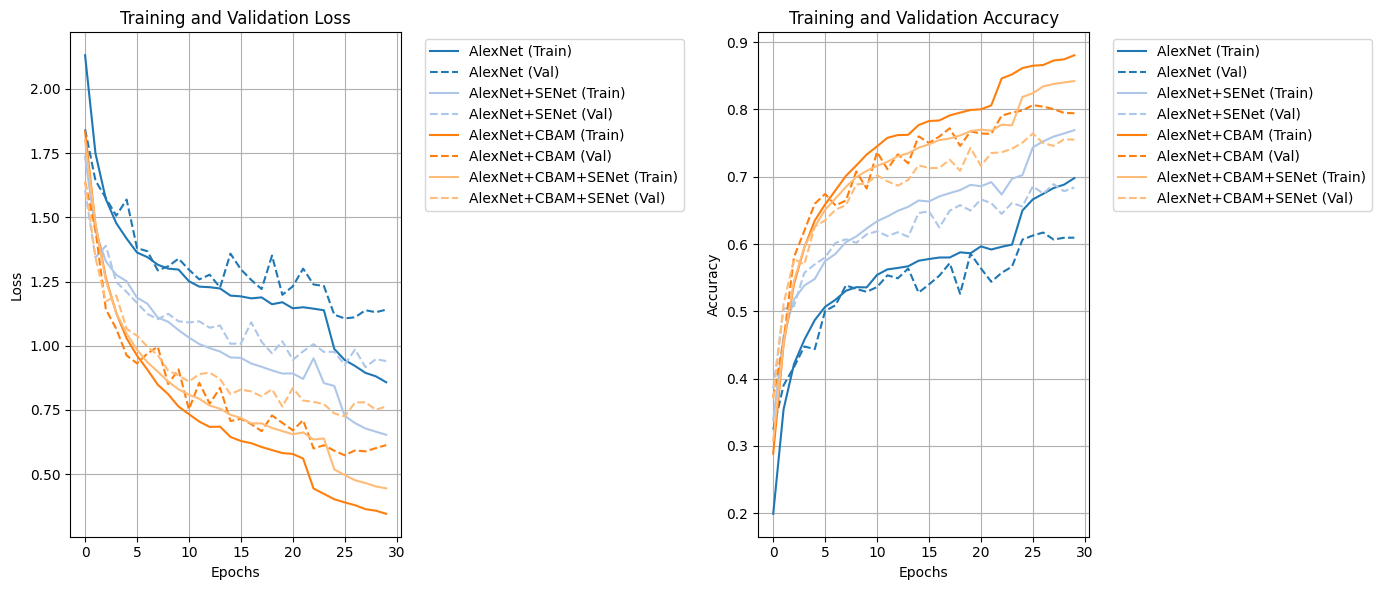

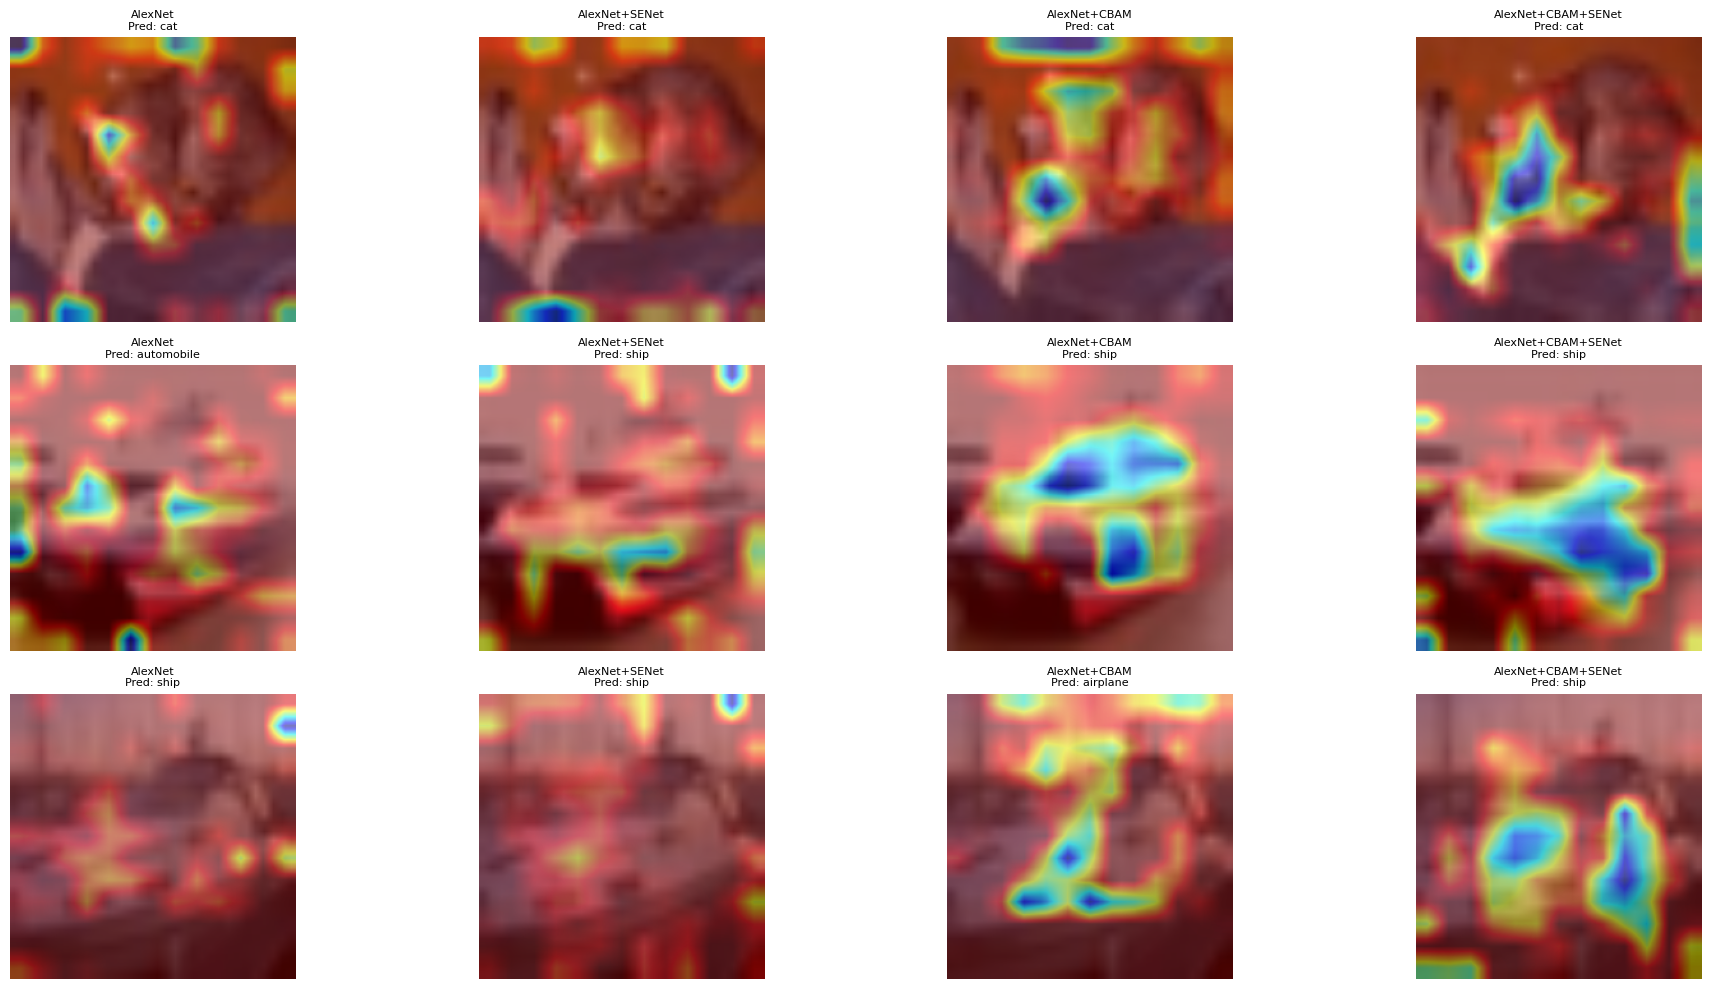

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Définir le device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Charger les données
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

class_names = trainset.classes

# Modules d'attention
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels//reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channels//reduction, channels, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.global_avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class CBAMBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(CBAMBlock, self).__init__()
        self.se_block = SEBlock(channels, reduction)
        self.spatial_att = nn.Sequential(
            nn.Conv2d(2, 1, kernel_size=7, padding=3, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.se_block(x)
        max_pool = torch.max(x, dim=1, keepdim=True)[0]
        avg_pool = torch.mean(x, dim=1, keepdim=True)
        spatial_att = torch.cat([max_pool, avg_pool], dim=1)
        spatial_att = self.spatial_att(spatial_att)
        return x * spatial_att.expand_as(x)

# Modification des modèles
def modify_model(base_model, model_name, use_senet=False, use_cbam=False):
    if model_name == "AlexNet":
        features = list(base_model.features.children())
        channels = 256
    else:
        raise ValueError("Modèle non supporté")
    
    new_layers = []
    for layer in features:
        new_layers.append(layer)
        if isinstance(layer, nn.Conv2d):
            if use_senet:
                new_layers.append(SEBlock(layer.out_channels))
            if use_cbam:
                new_layers.append(CBAMBlock(layer.out_channels))
    
    return nn.Sequential(
        nn.Sequential(*new_layers),
        nn.AdaptiveAvgPool2d((1, 1)),
        nn.Flatten(),
        nn.Linear(channels, 10)
    ).to(device)

# Initialisation des modèles
models_dict = {
    "AlexNet": modify_model(models.alexnet(weights=models.AlexNet_Weights.DEFAULT), "AlexNet"),
    "AlexNet+SENet": modify_model(models.alexnet(weights=models.AlexNet_Weights.DEFAULT), "AlexNet", use_senet=True),
    "AlexNet+CBAM": modify_model(models.alexnet(weights=models.AlexNet_Weights.DEFAULT), "AlexNet", use_cbam=True),
    "AlexNet+CBAM+SENet": modify_model(models.alexnet(weights=models.AlexNet_Weights.DEFAULT), "AlexNet", use_senet=True, use_cbam=True),
}

# Fonction d'entraînement avec validation et suivi des métriques
def train_model_with_validation(model, trainloader, testloader, criterion, optimizer, scheduler, epochs=30, patience=5):
    model.train()
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_loss = float('inf')
    trigger_times = 0  # Compteur pour Early Stopping
    
    for epoch in range(epochs):
        # Phase d'entraînement
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        train_loss = running_loss / len(trainloader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        
        # Phase de validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        val_loss /= len(testloader)
        val_accuracy = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Affichage des métriques
        print(f"Epoch [{epoch+1}/{epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        print("-" * 50)

        # Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0  # Réinitialiser le compteur
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print("Early stopping triggered!")
                break  # Arrêter l'entraînement
        
        # Réduction du taux d'apprentissage
        scheduler.step(val_loss)
    
    return train_losses, val_losses, train_accuracies, val_accuracies, all_preds, all_labels

# Fonction pour afficher les métriques de classification
def print_classification_metrics(all_labels, all_preds, class_names):
    print("\nClassification Metrics:")
    print(f"Accuracy: {accuracy_score(all_labels, all_preds):.4f}")
    print(f"Precision: {precision_score(all_labels, all_preds, average='macro'):.4f}")
    print(f"Recall: {recall_score(all_labels, all_preds, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(all_labels, all_preds, average='macro'):.4f}")
    
    # Matrice de confusion
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Fonction pour tracer les courbes d'apprentissage
def plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies, model_name):
    plt.figure(figsize=(12, 5))
    
    # Courbes de perte
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'{model_name} - Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Courbes d'accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Entraînement et évaluation des modèles
criterion = nn.CrossEntropyLoss()
epochs = 30  # Augmenté pour mieux voir les courbes
patience = 5 #nombre d'epoques pour Early Stopping
results = {}

for name, model in models_dict.items():
    print(f"\nEntraînement et évaluation de {name}...")

    #Optimiseur avec Weight Decay
    optimizer = optim.Adam(model.parameters(), lr=0.003, weight_decay=1e-4)

    # Scheduler pour réduire le taux d'apprentissage
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)
    
    # Entraînement avec validation
    train_losses, val_losses, train_accuracies, val_accuracies, all_preds, all_labels = train_model_with_validation(
        model, trainloader, testloader, criterion, optimizer, scheduler, epochs, patience)
    
    # Stocker les résultats
    results[name] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'predictions': all_preds,
        'labels': all_labels
    }
    
    # Affichage des métriques de classification
    print_classification_metrics(all_labels, all_preds, class_names)
    
    # Tracer les courbes d'apprentissage
    plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies, name)
    
# Fonction pour tracer le résumé des courbes de tous les modèles
def plot_summary_curves(results):
    plt.figure(figsize=(14, 6))
    
    # Couleurs pour chaque modèle
    colors = plt.cm.tab20.colors  # Utilisation d'une palette de couleurs
    
    # Tracer les courbes de perte
    plt.subplot(1, 2, 1)
    for idx, (name, data) in enumerate(results.items()):
        plt.plot(data['train_losses'], linestyle='-', color=colors[idx], label=f'{name} (Train)')
        plt.plot(data['val_losses'], linestyle='--', color=colors[idx], label=f'{name} (Val)')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Légende à droite
    plt.grid(True)
    
    # Tracer les courbes d'accuracy
    plt.subplot(1, 2, 2)
    for idx, (name, data) in enumerate(results.items()):
        plt.plot(data['train_accuracies'], linestyle='-', color=colors[idx], label=f'{name} (Train)')
        plt.plot(data['val_accuracies'], linestyle='--', color=colors[idx], label=f'{name} (Val)')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Légende à droite
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Appeler cette fonction après l'entraînement de tous les modèles
plot_summary_curves(results)

# Visualisation Grad-CAM (inchangé)
def generate_gradcam(model, img_tensor, target_layer):
    model_output = []
    def hook_fn(module, input, output):
        model_output.append(output)
    
    handle = target_layer.register_forward_hook(hook_fn)
    output = model(img_tensor.to(device))
    handle.remove()

    pred_class = output.argmax(dim=1).item()
    grad_output = torch.autograd.grad(output[:, pred_class], model_output[0])[0]
    weights = grad_output.mean(dim=(2, 3), keepdim=True)
    
    gradcam = torch.sum(weights * model_output[0], dim=1).squeeze()
    gradcam = F.relu(gradcam)
    if gradcam.max() > 0:
        gradcam /= gradcam.max()
    
    return gradcam.cpu().detach(), pred_class

# Affichage des résultats Grad-CAM (inchangé)
def display_gradcam(images, models_dict):
    fig, axes = plt.subplots(len(images), len(models_dict), figsize=(20, 10))
    
    for img_idx, img_tensor in enumerate(images):
        for model_idx, (name, model) in enumerate(models_dict.items()):
            target_layer = model[0][-3]  # Couche caractéristique profonde
            gradcam, pred_class = generate_gradcam(model, img_tensor.unsqueeze(0), target_layer)
            
            # Conversion de l'image
            img = img_tensor.permute(1, 2, 0).cpu().numpy()
            img = np.clip(img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1)
            
            # Superposition heatmap
            heatmap = cv2.resize(gradcam.numpy(), (224, 224))
            heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
            heatmap = np.float32(heatmap) / 255
            
            axes[img_idx, model_idx].imshow(img)
            axes[img_idx, model_idx].imshow(heatmap, alpha=0.5)
            axes[img_idx, model_idx].axis('off')
            axes[img_idx, model_idx].set_title(f"{name}\nPred: {class_names[pred_class]}", fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Test sur un batch
images, _ = next(iter(testloader))
display_gradcam(images[:3], models_dict)